# Get network stats

In [27]:
import pickle
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
import community as community_louvain
from collections import defaultdict, Counter
from infomap import Infomap

In [11]:
def graph_stats(G):
    """Returns various statistics of a given graph G."""
    stats = {}
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()
    stats['density'] = nx.density(G)
    
    degrees = [d for n, d in G.degree()]
    stats['mean_degree'] = np.mean(degrees)
    stats['std_degree'] = np.std(degrees)
    stats['global_clustering_coeff'] = nx.transitivity(G)
    
    stats['degree_assortativity'] = nx.degree_assortativity_coefficient(G)
    
    # Giant Connected Component (GCC)
    if nx.is_directed(G) == False:
        largest_cc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(largest_cc)
        stats['GCC_size'] = len(GCC)
    
    # Power-law fitting
    try:
        fit = powerlaw.Fit(degrees)
        stats['power_law_alpha'] = fit.alpha  # Power-law exponent
        stats['power_law_xmin'] = fit.xmin  # Minimum value where power law applies
        stats['ks_test_statistic'] = fit.D  # KS test statistic (lower is better)
        
        # Compare power law with other distributions
        distribution_list = ['lognormal', 'exponential', 'truncated_power_law']
        comparison_results = {}
        
        for dist in distribution_list:
            R, p = fit.distribution_compare('power_law', dist)
            comparison_results[dist] = (R, p)
        
        # Find the best alternative distribution (lowest R and p-value)
        best_fit = min(comparison_results.items(), key=lambda x: (x[1][0], x[1][1]))
        best_dist, (best_R, best_p) = best_fit
        
        stats['best_powerlaw_comparison'] = f"power law vs {best_dist}: R = {best_R:.3f}, p = {best_p:.3f}"
    
    except Exception as e:
        stats['power_law_test_error'] = str(e)
    
    return stats

# Likes network

In [20]:
with open("../shared-folder-gald/data/likes_network.pkl", "rb") as f:
    likes = pickle.load(f)

In [21]:
likes_stats = graph_stats(likes)

Calculating best minimal value for power law fit


Assuming nested distributions


In [22]:
for key, val in likes_stats.items():
    print(key,'-', val)

num_nodes - 496
num_edges - 9921
density - 0.08081622678396871
mean_degree - 40.00403225806452
std_degree - 22.83716869630462
global_clustering_coeff - 0.9331319000581058
degree_assortativity - 0.5769104907851405
GCC_size - 449
power_law_alpha - 3.9807634397976934
power_law_xmin - 39.0
ks_test_statistic - 0.17662559817547108
best_powerlaw_comparison - power law vs exponential: R = -7.855, p = 0.031


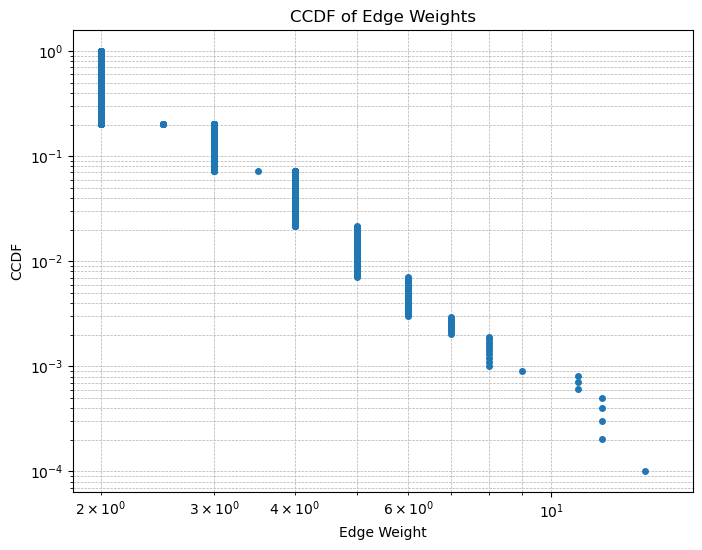

In [ ]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in likes.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Hashtag coocurence

In [4]:
with open('../shared-folder-gald/data/unipartite_og.pkl', 'rb') as f:
    HC = pickle.load(f)

In [5]:
HC_stats = graph_stats(HC)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Assuming nested distributions


In [7]:
for key, val in HC_stats.items():
    print(key,'-', val)

num_nodes - 673697
num_edges - 35570526
density - 0.00015674427983923908
mean_degree - 105.597994350576
std_degree - 713.0254975203421
diameter - None
degree_assortativity - -0.05238549368106408
GCC_size - 671514
power_law_alpha - 2.140394228821985
power_law_xmin - 154.0
ks_test_statistic - 0.007946039245517178
best_powerlaw_comparison - power law vs truncated_power_law: R = -134.901, p = 0.000


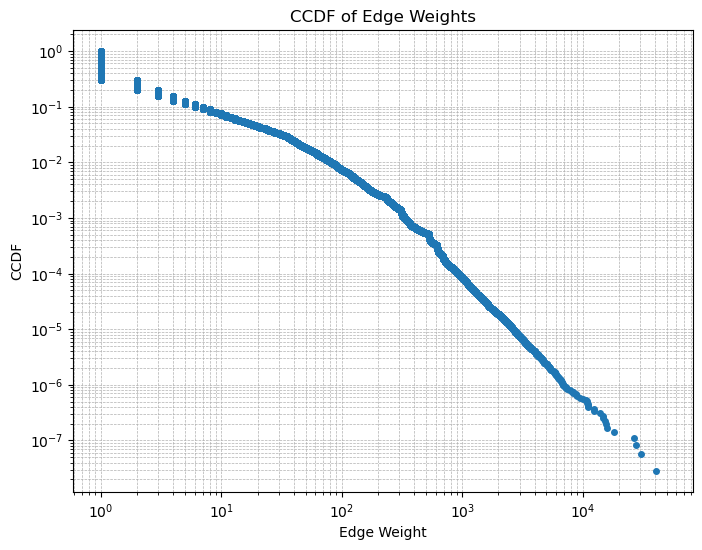

In [8]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in HC.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Follow network

In [9]:
with open('../shared-folder-gald/data/follow_graph.pkl', 'rb') as f:
    FG = pickle.load(f)

In [12]:
FG_stats = graph_stats(FG)

Calculating best minimal value for power law fit


Assuming nested distributions


In [13]:
for key, val in FG_stats.items():
    print(key,'-', val)

num_nodes - 62876
num_edges - 10786891
density - 0.002728559238120485
mean_degree - 343.116324193651
std_degree - 913.8445860384836
global_clustering_coeff - 0.12280097840676181
degree_assortativity - -0.15184128957300969
power_law_alpha - 2.551824576423133
power_law_xmin - 1152.0
ks_test_statistic - 0.028032308521774962
best_powerlaw_comparison - power law vs truncated_power_law: R = -32.243, p = 0.000


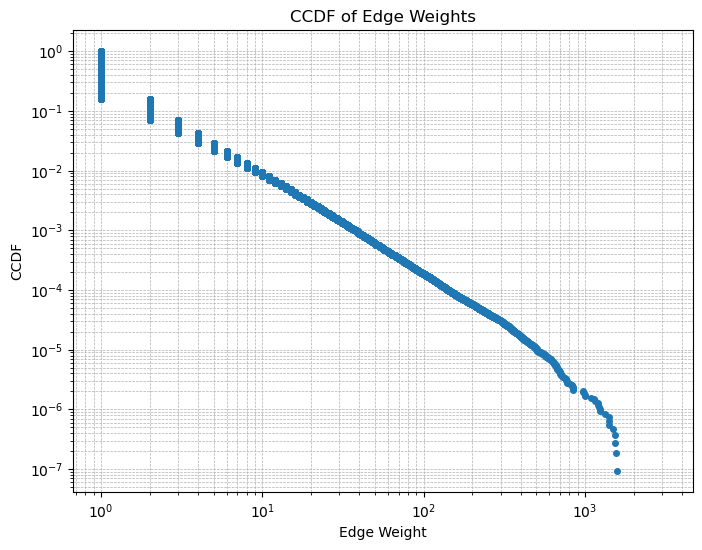

In [14]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in FG.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Duet/Stitch network

In [15]:
with open('../shared-folder-gald/data/duet_stitch_graph.pkl', 'rb') as f:
    ds = pickle.load(f)

In [16]:
ds_stats = graph_stats(ds)

Calculating best minimal value for power law fit


Assuming nested distributions


In [17]:
for key, val in ds_stats.items():
    print(key,'-', val)

num_nodes - 4209
num_edges - 55093
density - 0.0031105827906342284
mean_degree - 26.17866476597767
std_degree - 55.150688072688126
global_clustering_coeff - 0.06421140469689947
degree_assortativity - -0.16337379922791187
power_law_alpha - 2.6651836732904606
power_law_xmin - 100.0
ks_test_statistic - 0.04588388191193715
best_powerlaw_comparison - power law vs truncated_power_law: R = -0.834, p = 0.196


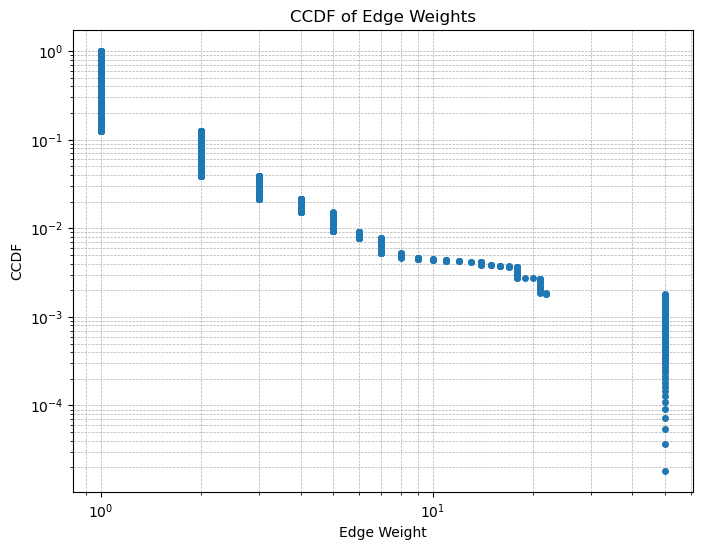

In [18]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in ds.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Filtering:
Disparity filter - understand the parameters


Analysis:
Overlap between networks np. highest weights
Map on semantic space and their differences

# Structural analysis

Networks' names:

duet/stitch - ds

follow - follows

haashtag coocurrence - hc

likes - likes

## Centralities

In [5]:
with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)

In [6]:
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)

In [8]:
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)

In [9]:
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

In [10]:
# degree centrality
ds_dc = nx.degree_centrality(ds)
follows_dc = nx.degree_centrality(follows)
hc_dc = nx.degree_centrality(hc)
likes_dc = nx.degree_centrality(likes)

# closeness centrality
ds_cc = nx.closeness_centrality(ds)
follows_cc = nx.closeness_centrality(follows)
hc_cc = nx.closeness_centrality(hc)
likes_cc = nx.closeness_centrality(likes)

# betweenness centrality
ds_bc = nx.betweenness_centrality(ds)
follows_bc = nx.betweenness_centrality(follows)
hc_bc = nx.betweenness_centrality(hc)
likes_bc = nx.betweenness_centrality(likes)


In [ ]:
# Bundle all centralities in a dictionary
centrality_data = {
    # Degree
    "ds_dc": ds_dc,
    "follows_dc": follows_dc,
    "hc_dc": hc_dc,
    "likes_dc": likes_dc,

    # Closeness
    "ds_cc": ds_cc,
    "follows_cc": follows_cc,
    "hc_cc": hc_cc,
    "likes_cc": likes_cc,

    # Betweenness
    "ds_bc": ds_bc,
    "follows_bc": follows_bc,
    "hc_bc": hc_bc,
    "likes_bc": likes_bc
}

# Save to pickle file
with open("analysis_output/all_centralities.pkl", "wb") as f:
    pickle.dump(centrality_data, f)

In [ ]:
import pickle

with open("analysis_output/all_centralities.pkl", "rb") as f:
    centrality_data = pickle.load(f)
# Degree Centrality
ds_dc = centrality_data["ds_dc"]
follows_dc = centrality_data["follows_dc"]
hc_dc = centrality_data["hc_dc"]
likes_dc = centrality_data["likes_dc"]

# Closeness Centrality
ds_cc = centrality_data["ds_cc"]
follows_cc = centrality_data["follows_cc"]
hc_cc = centrality_data["hc_cc"]
likes_cc = centrality_data["likes_cc"]

# Betweenness Centrality
ds_bc = centrality_data["ds_bc"]
follows_bc = centrality_data["follows_bc"]
hc_bc = centrality_data["hc_bc"]
likes_bc = centrality_data["likes_bc"]


In [3]:
def get_top_k(centrality_dict, k=50):
    """Return list of top-k hashtags sorted by centrality value."""
    return [tag for tag, val in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:k]]

# Get top 50 for each centrality & each network
top_50_degree = {
    'Hashtag Co-occurrence': get_top_k(hc_dc),
    'Likes': get_top_k(likes_dc),
    'Follows': get_top_k(follows_dc),
    'Duet/Stitch': get_top_k(ds_dc)
}
top_50_closeness = {
    'Hashtag Co-occurrence': get_top_k(hc_cc),
    'Likes': get_top_k(likes_cc),
    'Follows': get_top_k(follows_cc),
    'Duet/Stitch': get_top_k(ds_cc)
}
top_50_betweenness = {
    'Hashtag Co-occurrence': get_top_k(hc_bc),
    'Likes': get_top_k(likes_bc),
    'Follows': get_top_k(follows_bc),
    'Duet/Stitch': get_top_k(ds_bc)
}

df_degree = pd.DataFrame(top_50_degree)
df_closeness = pd.DataFrame(top_50_closeness)
df_betweenness = pd.DataFrame(top_50_betweenness)

In [4]:
# Create sets for all top 50 hashtags per centrality across all networks
degree_set = set(sum(top_50_degree.values(), []))
closeness_set = set(sum(top_50_closeness.values(), []))
betweenness_set = set(sum(top_50_betweenness.values(), []))


In [5]:
# Universally central hashtags (in top 50 of all 3 centralities)
central_in_all = degree_set & closeness_set & betweenness_set
print("Hashtags appearing in all three centrality top-50 lists:")
print(central_in_all)


Hashtags appearing in all three centrality top-50 lists:
{'animals', 'conservation', 'foryoupage', 'greenscreen', 'plasticpollution', 'frenchbulldogfamily', 'family', 'art', 'frenchbulldoggs', 'garden', 'yummy', 'foryou', 'science', 'climatechange', 'democrat', 'biden', 'gardentok', 'learnontiktok', 'climatejustice', 'sustainableliving', 'love', 'gardening', 'climate', 'republican', 'zerowaste', 'politics', 'vegan', 'weather', 'frenchbulldogfluffy', 'slowfashion', 'sustainability', 'trump', 'nature', 'climateaction', 'fyp', 'plasticfree', 'ecofriendly', 'frenchbulldogforsale', 'socialjustice', 'news', 'sustainable', 'sustainablefashion', 'ocean', 'climatecrisis', 'ecotok', 'plantbased'}


In [7]:
hashtag_to_centralities = defaultdict(set)

for tag in degree_set:
    hashtag_to_centralities[tag].add("degree")
for tag in closeness_set:
    hashtag_to_centralities[tag].add("closeness")
for tag in betweenness_set:
    hashtag_to_centralities[tag].add("betweenness")

# Prepare containers for results
unique_to_degree = []
unique_to_closeness = []
unique_to_betweenness = []

# Populate based on the same logic
for tag, centralities in hashtag_to_centralities.items():
    if len(centralities) == 1:
        cent = list(centralities)[0]
        if cent == "degree":
            unique_to_degree.append(tag)
        elif cent == "closeness":
            unique_to_closeness.append(tag)
        elif cent == "betweenness":
            unique_to_betweenness.append(tag)

# Display results
print("🎯 Hashtags uniquely central by centrality type:\n")

print("🔹 Degree Centrality (unique):")
print(unique_to_degree, "\n")

print("🔹 Closeness Centrality (unique):")
print(unique_to_closeness, "\n")

print("🔹 Betweenness Centrality (unique):")
print(unique_to_betweenness)


🎯 Hashtags uniquely central by centrality type:

🔹 Degree Centrality (unique):
['dancingfruit', 'lemonade', 'icedcoffee', 'duet', 'joebiden', 'shangela', 'icedtea', 'nativeamerican', 'bachelornation', 'drinkspindrift', 'instagood', 'drinksupercoffee', 'lemonades', 'icecoffee', 'lemonade🍋', 'easylunches', 'lemon', 'video', 'trend', 'dancing', 'easydressing', 'fastdressing', 'dance', 'mocha', 'dancingwiththestars', 'democrats', 'lemongrass', 'dancingongma', 'flavoryourworld', 'viraltiktok', 'gma', 'fy', 'comedy', 'drinks', 'drinkidea', 'youtube', 'lemonicetea', 'memes', 'ice', 'drink', 'redcarpet', 'cute', 'lowwaste', 'icecoffees', 'royals', 'info', 'like', 'icedcoffees', 'easydressingrecipe', 'flavoryourwater', 'oscars', 'drinkideas', 'mochacoffee', 'dwts', 'mochas', 'easylunch', 'beautiful', 'easylunchideas', 'maga', 'motivation'] 

🔹 Closeness Centrality (unique):
['antiracistallies', 'dadsoftiktok', 'gratitude', 'usa_tiktok', 'sagaftra', 'frenchbulldoginstagram', 'shocking', 'artwork

/tmp/ipykernel_1273064/2242771148.py:47: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.tight_layout()


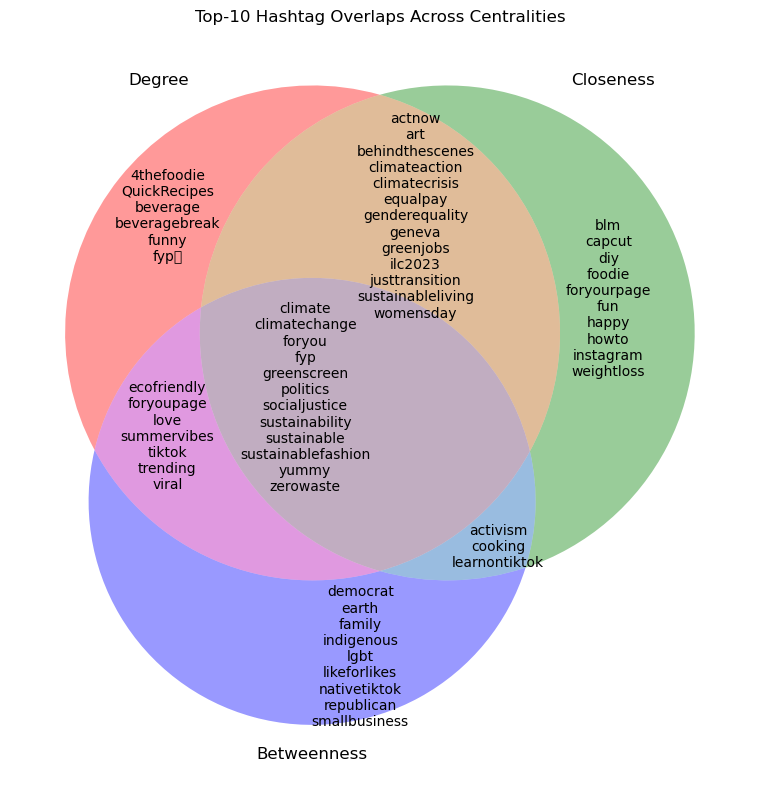

In [40]:
# Compute the sets
degree_top10 = set(sum(top_10_degree.values(), []))
closeness_top10 = set(sum(top_10_closeness.values(), []))
betweenness_top10 = set(sum(top_10_betweenness.values(), []))

# Create the Venn diagram
plt.figure(figsize=(10, 8))
v = venn3(
    [degree_top10, closeness_top10, betweenness_top10],
    set_labels=('Degree', 'Closeness', 'Betweenness')
)

# Helper: Get hashtags in a specific subset
def get_subset_labels(d, c, b):
    return {
        '100': d - c - b,
        '010': c - d - b,
        '001': b - d - c,
        '110': d & c - b,
        '101': d & b - c,
        '011': c & b - d,
        '111': d & c & b
    }

labels = get_subset_labels(degree_top10, closeness_top10, betweenness_top10)

# Manually adjust label placement to avoid overlap
label_positions = {
    '100': (-0.35, 0.3),
    '010': (0.45, 0.15),
    '001': (0.0, -0.5),
    '110': (0.1, 0.3),
    '101': (-0.35, -0.1),
    '011': (0.25, -0.3),
    '111': (-0.1, -0.03)
}

# Assign hashtags to each area and adjust their positions
for subset_id, hashtags in labels.items():
    label = v.get_label_by_id(subset_id)
    if label and hashtags:
        label.set_text("\n".join(sorted(hashtags)))
        x_pos, y_pos = label_positions[subset_id]
        label.set_position((x_pos, y_pos))

plt.title("Top-10 Hashtag Overlaps Across Centralities")
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig("analysis_output/venn_diagram_top10_hashtags.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [45]:
# Define your top 50 hashtag sets
hc_top50 = set(top_50_degree['Hashtag Co-occurrence']) | set(top_50_closeness['Hashtag Co-occurrence']) | set(top_50_betweenness['Hashtag Co-occurrence'])
likes_top50 = set(top_50_degree['Likes']) | set(top_50_closeness['Likes']) | set(top_50_betweenness['Likes'])
follows_top50 = set(top_50_degree['Follows']) | set(top_50_closeness['Follows']) | set(top_50_betweenness['Follows'])
ds_top50 = set(top_50_degree['Duet/Stitch']) | set(top_50_closeness['Duet/Stitch']) | set(top_50_betweenness['Duet/Stitch'])

# Combine all sets into a dictionary for easy access
all_sets = {
    'Hashtag Co-occurrence': hc_top50,
    'Likes': likes_top50,
    'Follows': follows_top50,
    'Duet/Stitch': ds_top50
}

# Flatten everything into one big set of all hashtags
all_hashtags = hc_top50 | likes_top50 | follows_top50 | ds_top50

# Count in how many sets each hashtag appears
hashtag_counts = defaultdict(int)
for net_set in all_sets.values():
    for tag in net_set:
        hashtag_counts[tag] += 1

# Identify hashtags that appear in only one network
unique_to_one_network = {tag for tag, count in hashtag_counts.items() if count == 1}

# Now for each centrality and network, find the hashtags that appear ONLY in that centrality/network combination
for network_name, network_set in all_sets.items():
    print(f"\nHashtags unique to {network_name}:")

    # For each centrality type (Degree, Closeness, Betweenness)
    for centrality_name, centrality_dict in zip(['Degree', 'Closeness', 'Betweenness'], 
                                               [top_50_degree, top_50_closeness, top_50_betweenness]):
        # Convert the centrality to a set
        centrality_set = set(centrality_dict[network_name])
        
        # Find hashtags that are unique to this centrality in the current network
        # Unique to centrality means it is in this centrality but not in the other centralities
        if centrality_name == 'Degree':
            unique_in_centrality = centrality_set - (set(top_50_closeness[network_name]) | set(top_50_betweenness[network_name]))
        elif centrality_name == 'Closeness':
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_betweenness[network_name]))
        else:  # Betweenness
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_closeness[network_name]))
        
        # Print the hashtags unique to this centrality
        if unique_in_centrality:
            print(f"{centrality_name} Centrality: {sorted(unique_in_centrality)}")


Hashtags unique to Hashtag Co-occurrence:
Degree Centrality: ['animals', 'beautiful', 'comedy', 'cute', 'duet', 'explore', 'fy', 'instagood', 'like', 'memes', 'motivation', 'trend', 'video', 'viraltiktok', 'youtube']
Closeness Centrality: ['amazon', 'artwork', 'cool', 'dadsoftiktok', 'eat', 'england', 'fashiontiktok', 'fire', 'foodstagram', 'friends', 'garden', 'goviral', 'gratitude', 'halloween', 'homedecor', 'howto', 'levelup', 'livemusic', 'lmao', 'local', 'pain', 'pet', 'planet', 'punchdance', 'reallifeathome', 'recipes', 'recommendations', 'relationships', 'selfcare', 'sports', 'tiktokindia', 'usa_tiktok', 'vlog', 'weightloss', 'weird', 'work', 'world', 'wth', 'zodiac']
Betweenness Centrality: ['asmr', 'california', 'climatechange', 'conservation', 'ecofriendly', 'environment', 'florida', 'gardening', 'handmade', 'health', 'history', 'home', 'homemade', 'ocean', 'plantbased', 'science', 'smallbusiness', 'style', 'sustainability', 'sustainablefashion', 'sustainableliving', 'vegan'

## Community detection

In [28]:
# load the networks

with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

### Likes

In [29]:
likes_partition = community_louvain.best_partition(likes)
# nx.set_node_attributes(likes, partition, 'community')

In [30]:
likes_comm_sizes = Counter(likes_partition.values())
print(f"Number of communities: {len(likes_comm_sizes)}")
print("Community sizes:", likes_comm_sizes)

Number of communities: 12
Community sizes: Counter({1: 78, 8: 61, 2: 52, 7: 52, 4: 48, 5: 47, 3: 47, 6: 45, 10: 31, 11: 19, 0: 12, 9: 4})


In [31]:
likes_comm_hashtags = defaultdict(list)
for node, comm_id in likes_partition.items():
    likes_comm_hashtags[comm_id].append(node)

likes_sorted_comms = sorted(likes_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in likes_sorted_comms[:10]:
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(members[:50]))  # show top 10


Community 1 (size=78):
4thefoodie, QuickRecipes, beverage, beveragebreak, beverageideas, beverages, break, breaks, coffee, coffees, cottagecheese, cottagecheeserecipes, dance, dancing, dancingfruit, drink, drinkidea, drinkideas, drinks, drinkspindrift, drinksupercoffee, easydressing, easydressingrecipe, easylunch, easylunches, easylunchideas, fastdressing, flavoryourwater, flavoryourworld, ice, icecoffee, icecoffees, icedcoffee, icedcoffees, icedtea, lemon, lemonade, lemonades, lemonade🍋, lemongrass, lemonicetea, mocha, mochacoffee, mochas, moment, moments, onlineshop, onlineshopping, reflecting, refresh

Community 8 (size=61):
activism, activist, actonclimate, advocacy, callcongress, carbonpricing, carbontax, cleanenergy, climate, climateaction, climatechange, climatecrisis, ecotok, grassrootsclimate, michaelscott, michaelscottquotes, phoneanxiety, phoneanxietyisreal, priceoncarbon, selenagomez, shouldimakesomedrama, theoffice, volunteer, volunteering, waterwithalemonslice, 5nightsat

### Hashtag coocurrence

In [32]:
hc_partition = community_louvain.best_partition(hc)

In [33]:
hc_comm_sizes = Counter(hc_partition.values())
print(f"Number of communities: {len(hc_comm_sizes)}")
print("Community sizes:", hc_comm_sizes)

Number of communities: 497
Community sizes: Counter({17: 5471, 0: 3291, 7: 2920, 5: 2896, 1: 2888, 6: 2872, 20: 1729, 23: 1472, 21: 1431, 9: 1415, 2: 1170, 19: 1042, 47: 959, 15: 845, 3: 815, 42: 813, 10: 803, 12: 716, 18: 712, 26: 647, 14: 608, 11: 581, 13: 395, 27: 340, 22: 320, 29: 316, 32: 176, 16: 175, 30: 131, 77: 78, 46: 67, 45: 63, 35: 52, 58: 40, 79: 28, 68: 24, 169: 23, 135: 20, 24: 19, 80: 17, 337: 17, 213: 16, 137: 12, 39: 11, 83: 11, 87: 11, 242: 11, 69: 9, 107: 9, 167: 9, 37: 8, 38: 8, 40: 8, 113: 8, 149: 8, 150: 8, 219: 8, 263: 8, 285: 8, 299: 8, 101: 7, 177: 7, 186: 7, 327: 7, 28: 6, 75: 6, 108: 6, 244: 6, 250: 6, 368: 6, 31: 5, 36: 5, 52: 5, 93: 5, 106: 5, 121: 5, 182: 5, 189: 5, 210: 5, 275: 5, 282: 5, 294: 5, 297: 5, 391: 5, 56: 4, 57: 4, 91: 4, 92: 4, 112: 4, 128: 4, 153: 4, 158: 4, 173: 4, 191: 4, 193: 4, 208: 4, 238: 4, 249: 4, 256: 4, 264: 4, 267: 4, 289: 4, 293: 4, 298: 4, 322: 4, 341: 4, 342: 4, 349: 4, 351: 4, 377: 4, 431: 4, 41: 3, 48: 3, 49: 3, 54: 3, 55: 3,

In [34]:
hc_comm_hashtags = defaultdict(list)
for node, comm_id in hc_partition.items():
    hc_comm_hashtags[comm_id].append(node)

hc_sorted_comms = sorted(hc_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in hc_sorted_comms[:10]:
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(members[:50])) 


Community 17 (size=5471):
art, style, fashionillustration, fashiondesign, haul, thrift, thrifttok, smallbusinessowner, nostalgia, smallbusiness, secondhand, thrifting, smallbusinesscheck, fashiontiktok, treanding, thrifted, grwm, diy, iamtorisimmons, sewing, torisimmonsofficial, beforeandafter, sew, sustainablefashion, sunnies, sunglasses, consciousliving, ditchsingleuse, neutralhomedecor, unpapertowels, homeandsoul, furniture, ethical, homeandsouldubai, mompreneur, dubailiving, dubaismallbusiness, greenliving, decor, madeinoregon, worldnewstonight, zerowaste, reducereuse, boho, lowwaste, homedesign, thinkreusable, madeinamerica, gogreen, dubaiinteriors

Community 0 (size=3291):
christianliving, blessed, life, bibleverses, truth, amen, godsword, christianquotes, lord, worship, goodnews, verseoftheday, wordofgod, motivation, biblejournaling, peace, grace, jesusisking, christians, praise, pray, jesussaves, salvation, believe, godislove, jesusislord, jesuslovesyou, holybible, trustgod, i

### Duet/Stitch

In [35]:
ds_nodes = list(ds.nodes())
ds_node_to_id = {node: i for i, node in enumerate(ds_nodes)}
ds_id_to_node = {i: node for node, i in ds_node_to_id.items()}


In [36]:
ds_im = Infomap()

for u, v in ds.edges():
    ds_im.add_link(ds_node_to_id[u], ds_node_to_id[v])

ds_im.run()

  Infomap v2.8.0 starts at 2025-04-18 14:25:38
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 4209 nodes and 55093 links...
  -> One-level codelength: 11.0248162

Trial 1/1 starting at 2025-04-18 14:25:38
Two-level compression: 16% 1.7% 
Partitioned to codelength 1.69143344 + 7.44151616 = 9.132949608 in 94 modules.
Super-level compression: to codelength 9.132949608 in 94 top modules.

Recursive sub-structure compression: 0.015989911% 0% . Found 3 levels with codelength 9.131489258

=> Trial 1/1 finished in 0.067713125s with codelength 9.13148926


Summary after 1 trial
Best end modular solution in 3 levels:
Per level number of modules:         [         94,           3,           0] (sum: 97)
Per level number of leaf nodes:      [          0,        

In [37]:
ds_node_to_module = {ds_id_to_node[node.node_id]: node.module_id for node in ds_im.nodes}

ds_comm_sizes = Counter(ds_node_to_module.values())

print(f"Number of communities: {len(ds_comm_sizes)}")
print("Top 10 community sizes:", ds_comm_sizes.most_common(10))

Number of communities: 94
Top 10 community sizes: [(1, 831), (2, 485), (3, 181), (5, 154), (4, 141), (6, 109), (7, 86), (9, 75), (8, 62), (11, 62)]


In [38]:
ds_comms = defaultdict(list)
for node_id, module_id in ds_node_to_module.items():
    ds_comms[module_id].append(node_id)

ds_sorted_comms = sorted(ds_comms.items(), key=lambda x: len(x[1]), reverse=True)

for module_id, members in ds_sorted_comms[:10]:
    print(f"\nCommunity {module_id} (size={len(members)}):")
    print(", ".join(members[:50]))


Community 1 (size=831):
politics, republican, democrat, liberal, biden, climatechange, trump, conservative, politicaltiktok, usa, climatecrisis, maga, political, leftist, worldnews, learnontiktok, gop, russia, donaldtrump, joebiden, ukrainewar, ukraine, democrats, celebs, trump2024, celebrity, nowthisnews, feelgood, entertainment, nowthis, wga, sagaftra, writersstrike, pakistan, genz, republicans, newsroundup, roundup, thisweek, australia, zelenskyy, texas, congress, voteblue, unitedstates, fyi, vote, 2024election, floods, american

Community 2 (size=485):
socialjustice, ilc2023, equalpay, justtransition, genderequality, behindthescenes, greenjobs, actnow, womensday, geneva, universityseries, arizona, me, freehawaii, kanakaincollege, advocate, kanakatiktok, universitylife, kanakamaoli, hawaiitiktok, realhawaii, humor, getcrackin, christiansoftiktok, tiktokchristian, smartkids, tiktokpastor, metaverse, survivor, chooselove, recoveryispossible, joy, manofthehouse, humanconnection, gende

### Follows

In [39]:
follows_nodes = list(follows.nodes()) 
follows_node_to_id = {node: i for i, node in enumerate(follows_nodes)}
follows_id_to_node = {i: node for node, i in follows_node_to_id.items()}


In [40]:
follows_im = Infomap()

for u, v in follows.edges():
    follows_im.add_link(follows_node_to_id[u], follows_node_to_id[v])

follows_im.run()

  Infomap v2.8.0 starts at 2025-04-18 14:25:39
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 26627 nodes and 402510 links...
  -> One-level codelength: 11.8168979

Trial 1/1 starting at 2025-04-18 14:25:39
Two-level compression: 6.4% 1.3% 0.00113723394% 
Partitioned to codelength 1.2365179 + 9.67745333 = 10.91397123 in 93 modules.
Super-level compression: to codelength 10.91397123 in 93 top modules.

Recursive sub-structure compression: 4.28569866e-05% 0% . Found 3 levels with codelength 10.91396656

=> Trial 1/1 finished in 0.478513208s with codelength 10.9139666


Summary after 1 trial
Best end modular solution in 3 levels:
Per level number of modules:         [         93,           2,           0] (sum: 95)
Per level number of leaf nodes:      [

In [41]:
follows_node_to_module = {follows_id_to_node[node.node_id]: node.module_id for node in follows_im.nodes}

follows_comm_sizes = Counter(follows_node_to_module.values())

print(f"Number of communities: {len(follows_comm_sizes)}")
print("Top 10 community sizes:", follows_comm_sizes.most_common(10))

Number of communities: 93
Top 10 community sizes: [(1, 6053), (2, 4938), (3, 3407), (4, 2383), (5, 2184), (6, 2110), (7, 1099), (8, 954), (9, 580), (10, 362)]


In [42]:
follows_comms = defaultdict(list)
for node_id, module_id in follows_node_to_module.items():
    follows_comms[module_id].append(node_id)

follows_sorted_comms = sorted(follows_comms.items(), key=lambda x: len(x[1]), reverse=True)

for module_id, members in follows_sorted_comms[:10]:
    print(f"\nCommunity {module_id} (size={len(members)}):")
    print(", ".join(members[:50])) 



Community 1 (size=6053):
climatechange, sustainability, zerowaste, climatecrisis, ecofriendly, sustainableliving, climateaction, sustainable, learnontiktok, ecotok, plasticfree, lowwaste, plasticpollution, climate, climatejustice, environment, cop27, zerowasteliving, foodwaste, smallbusiness, goodnews, environmentaljustice, eco, sustainabilitytiktok, fossilfuels, climateemergency, earthday, ad, sustainableswaps, refillshop, climatesolutions, ecofriendlyproducts, sustainablelifestyle, greenwashing, beachcleanup, refill, earth, refillery, recycle, goodclimatenews, pollution, reducereuserecycle, lowwasteliving, podcast, recycling, refillstore, cleantok, bigoil, climateoptimism, plastic

Community 2 (size=4938):
politics, greenscreen, biden, democrat, republican, trump, liberal, ukraine, gop, politicaltiktok, conservative, crime, leftist, genz, russia, political, voteblue, maga, florida, republicans, donaldtrump, palestine, congress, democrats, socialism, lgbt, ukrainewar, crimetok, polit